# Introduction to Pandas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Load the dataset

In [2]:
df = pd.read_csv('tested.csv')

#### Read the first few rows

In [3]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
df.shape

(418, 12)

In [5]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
df.nunique()

PassengerId    418
Survived         2
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Cabin           76
Embarked         3
dtype: int64

#### Check for missing values

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [9]:
low_age = df[df['Age'] < 1]
low_age

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
201,1093,0,3,"Danbom, Master. Gilbert Sigvard Emanuel",male,0.33,0,2,347080,14.400,NaN,S
250,1142,1,2,"West, Miss. Barbara J",female,0.92,1,2,C.A. 34651,27.750,NaN,S
281,1173,0,3,"Peacock, Master. Alfred Edward",male,0.75,1,1,SOTON/O.Q. 3101315,13.775,NaN,S
307,1199,0,3,"Aks, Master. Philip Frank",male,0.83,0,1,392091,9.350,NaN,S
354,1246,1,3,"Dean, Miss. Elizabeth Gladys Millvina""""",female,0.17,1,2,C.A. 2315,20.575,NaN,S


#### Handling missing values

In [10]:
n = df['Age'].dropna().shape[0]
q75, q25 = np.percentile(df['Age'].dropna(), [75, 25])
iqr = q75 - q25
bin_width = 2 * iqr / n**(1/3)
bins = int((df['Age'].max() - df['Age'].min()) / bin_width)

print("Number of bins (Freedman-Diaconis Rule):", bins)


Number of bins (Freedman-Diaconis Rule): 14


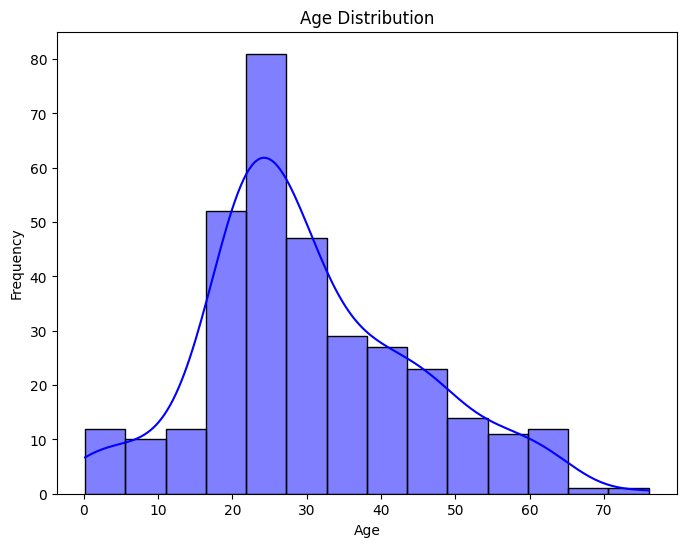

In [11]:
# view the age distribution first

plt.figure(figsize = (8, 6))
sns.histplot(df['Age'].dropna(), bins=bins, kde=True, color='blue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

In [12]:
median_age = df['Age'].median()
df['Age'] = df['Age'].fillna(median_age)
median_age

27.0

#### Filling the cabin column

In [13]:
# Filling the Cabin column
df[df['Cabin'].notnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
12,904,1,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23.0,1,0,21228,82.2667,B45,S
14,906,1,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",female,47.0,1,0,W.E.P. 5734,61.1750,E31,S
24,916,1,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,C
26,918,1,1,"Ostby, Miss. Helene Ragnhild",female,22.0,0,1,113509,61.9792,B36,C
28,920,0,1,"Brady, Mr. John Bertram",male,41.0,0,0,113054,30.5000,A21,S
...,...,...,...,...,...,...,...,...,...,...,...,...
404,1296,0,1,"Frauenthal, Mr. Isaac Gerald",male,43.0,1,0,17765,27.7208,D40,C
405,1297,0,2,"Nourney, Mr. Alfred (Baron von Drachstedt"")""",male,20.0,0,0,SC/PARIS 2166,13.8625,D38,C
407,1299,0,1,"Widener, Mr. George Dunton",male,50.0,1,1,113503,211.5000,C80,C
411,1303,1,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q


In [14]:
df['Cabin'].mode()

0    B57 B59 B63 B66
Name: Cabin, dtype: object

In [15]:
# df['Age'].mean()

In [16]:
# df['Age'].mode()

In [17]:
# df.dtypes

In [18]:
df.nunique()

PassengerId    418
Survived         2
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Cabin           76
Embarked         3
dtype: int64

In [19]:
newdf = df.copy()
newdf.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [20]:
newdf.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


#### Using RandomForest Classifier to predit the missing values in the cabin column

In [21]:
newdf.dropna(subset= ['Cabin'], inplace= True)

In [22]:
newdf.shape

(91, 12)

In [23]:
# Because ML algorithms cannot read strings or text data, there is a need to asign a number to all categories within a column using Label Encoder.
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Encode the 'Sex' column
newdf['Sex_encoded'] = le.fit_transform(newdf['Sex'])

# Encode the 'Embarked' column
newdf['Embarked_encoded'] = le.fit_transform(newdf['Embarked'])

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [25]:
newdf.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Sex_encoded',
       'Embarked_encoded'],
      dtype='object')

In [26]:
X = newdf.drop(['PassengerId', 'Name', 'Sex', 'Age', 'Ticket', 'Fare', 'Embarked','Cabin'], axis = 1)
y = newdf['Cabin']

In [27]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest Classifier model
rfc = RandomForestClassifier(random_state=35)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=35)

In [28]:
predicted_cabin = rfc.predict(newdf[['Survived', 'Pclass', 'SibSp', 'Parch', 'Sex_encoded',
       'Embarked_encoded']])
predicted_cabin

array(['E31', 'E31', 'B57 B59 B63 B66', 'B51 B53 B55', 'C39', 'C62 C64',
       'C39', 'E31', 'C6', 'A11', 'C55 C57', 'C101', 'F', 'A11',
       'B57 B59 B63 B66', 'C6', 'C23 C25 C27', 'C6', 'A11', 'C6', 'C101',
       'C55 C57', 'A34', 'E31', 'C86', 'F', 'A11', 'E31', 'A34', 'C6',
       'C86', 'C6', 'B57 B59 B63 B66', 'C39', 'B51 B53 B55', 'D28', 'C39',
       'C6', 'C62 C64', 'D28', 'B57 B59 B63 B66', 'E52', 'E31', 'B41',
       'B57 B59 B63 B66', 'C62 C64', 'A11', 'C39', 'B41', 'F', 'C62 C64',
       'C62 C64', 'C86', 'E52', 'C55 C57', 'C62 C64', 'C6', 'C86',
       'C55 C57', 'F E46', 'A34', 'D', 'A34', 'C22 C26', 'A34', 'A11',
       'C62 C64', 'F E46', 'F', 'F4', 'C6', 'C39', 'B51 B53 B55',
       'B51 B53 B55', 'C39', 'C101', 'C86', 'A11', 'C39', 'A34', 'C39',
       'C39', 'D28', 'E31', 'B41', 'D28', 'C62 C64', 'D', 'E52', 'C78',
       'A11'], dtype=object)

#### Using the RandomForest Classifier to predict the missing values from the 'df' table

In [29]:
# Create a LabelEncoder object
le = LabelEncoder()

# Encode the 'Sex' column
df['Sex_encoded'] = le.fit_transform(df['Sex'])

# Encode the 'Embarked' column
df['Embarked_encoded'] = le.fit_transform(df['Embarked'])

In [30]:
reg_pred = rfc.predict(df[['Survived', 'Pclass', 'SibSp', 'Parch', 'Sex_encoded',
       'Embarked_encoded']])

In [31]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Sex_encoded',
       'Embarked_encoded'],
      dtype='object')

In [32]:
# Create a new dataframe which holds all information from 'df' dataframe and the predicted values for the missing values
new = pd.DataFrame({'PassengerId': df['PassengerId'],
                    'Survived': df['Survived'],
                    'Pclass': df['Pclass'], 
                    'Name': df['Name'], 
                    'Sex': df['Sex'], 
                    'Age': df['Age'], 
                    'SibSp': df['SibSp'],
                    'Parch': df['Parch'], 
                    'Ticket': df['Ticket'], 
                    'Fare': df['Fare'], 
                    'Cabin': df['Cabin'], 
                    'Embarked': df['Embarked'],
                    'Cabin_filled': reg_pred.ravel()})

In [33]:
new

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_filled
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,F E46
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,C55 C57
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,D
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,F
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,A34
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,27.0,0,0,A.5. 3236,8.0500,NaN,S,F
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,A11
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,F
416,1308,0,3,"Ware, Mr. Frederick",male,27.0,0,0,359309,8.0500,NaN,S,F


In [34]:
# The below code says that anywhere there is null value in the Cabin column, take the value in the Cabin_filled column. If it's not null, leave as it is.
new['Cabin'] = np.where(new['Cabin'].isna(), new['Cabin_filled'], new['Cabin'])


In [35]:
new.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_filled
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,F E46,Q,F E46
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,C55 C57,S,C55 C57
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,D,Q,D
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,F,S,F
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,A34,S,A34


In [36]:
new.isnull().sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age             0
SibSp           0
Parch           0
Ticket          0
Fare            1
Cabin           0
Embarked        0
Cabin_filled    0
dtype: int64

In [37]:
df = new.copy()

In [38]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_filled
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,F E46,Q,F E46
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,C55 C57,S,C55 C57
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,D,Q,D
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,F,S,F
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,A34,S,A34


#### Filling the null value in Fare column

In [39]:
df.Fare.mean()

35.627188489208635

In [40]:
df.Fare.median()

14.4542

In [41]:
df.Fare.mode()

0    7.75
Name: Fare, dtype: float64

Since the Fare is right skewed, (the mean is greater than the median and mode) I will use the median to fill in the null value available

In [42]:
median_fare = df['Fare'].median()
df['Fare'] = df['Fare'].fillna(median_fare)
median_fare

14.4542

# Removing and Checking Duplicates

In [43]:
df.duplicated().sum() #There are no duplicates

0

In [44]:
# df = df.drop_duplicates(keep=False)

# Checking the datatype

In [45]:
df.dtypes

PassengerId       int64
Survived          int64
Pclass            int64
Name             object
Sex              object
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Cabin            object
Embarked         object
Cabin_filled     object
dtype: object

#### Changing to the correct datatypes

In [46]:
df[['PassengerId', 'Survived', 'Pclass']] = df[['PassengerId', 'Survived', 'Pclass']].astype('category')

In [47]:
df.dtypes

PassengerId     category
Survived        category
Pclass          category
Name              object
Sex               object
Age              float64
SibSp              int64
Parch              int64
Ticket            object
Fare             float64
Cabin             object
Embarked          object
Cabin_filled      object
dtype: object

# Data Exploration

In [48]:
# What methods can you use to calculate basic summary statistics (e.g., mean, median, min, max) for numeric columns like `Age`, `Fare`, etc.?
df.describe()

,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000
mean,29.599282,0.447368,0.392344,35.576535
std,12.703770,0.896760,0.981429,55.850103
min,0.170000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,27.000000,0.000000,0.000000,14.454200
75%,35.750000,1.000000,0.000000,31.471875
max,76.000000,8.000000,9.000000,512.329200


####    How can you group passengers by `Pclass` and `Survived` to determine how many passengers in each class survived?

In [49]:
df.groupby(['Pclass', 'Survived'])['PassengerId'].count()

C:\Users\DELL\AppData\Local\Temp\ipykernel_16996\2020140973.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['Pclass', 'Survived'])['PassengerId'].count()


Pclass  Survived
1       0            57
        1            50
2       0            63
        1            30
3       0           146
        1            72
Name: PassengerId, dtype: int64

#### How would you calculate the average age of passengers who survived compared to those who did not?

In [50]:
df.groupby(['Survived'])['Age'].mean()

C:\Users\DELL\AppData\Local\Temp\ipykernel_16996\447390149.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['Survived'])['Age'].mean()


Survived
0    29.522218
1    29.734145
Name: Age, dtype: float64

#### How can you determine the distribution of genders (`Sex`) among passengers?

In [51]:
df.groupby(['Sex'])['PassengerId'].count()

Sex
female    152
male      266
Name: PassengerId, dtype: int64

#### How would you calculate the survival rate for passengers in different age groups (e.g., <18, 18–40, 40–60, 60+)?  
#### What method would you use to bin the ages into these categories?


In [52]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 120]
labels = ['0 - 9', '10 - 19','20 -29', '30 - 39', '40 - 49', '50 - 59', '60 - 69', '70+']
df['Age_bin'] = pd.cut(df.Age, bins, labels = labels, include_lowest= True)
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_filled,Age_bin
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,F E46,Q,F E46,30 - 39
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,C55 C57,S,C55 C57,40 - 49
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,D,Q,D,60 - 69
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,F,S,F,20 -29
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,A34,S,A34,20 -29


#### How can you use the `groupby()` function with `Pclass` and `Sex` to determine survival rates based on gender and passenger class?

In [53]:
df.groupby(['Pclass', 'Sex', 'Survived'])['PassengerId'].count()

C:\Users\DELL\AppData\Local\Temp\ipykernel_16996\2306578645.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['Pclass', 'Sex', 'Survived'])['PassengerId'].count()


Pclass  Sex     Survived
1       female  0             0
                1            50
        male    0            57
                1             0
2       female  0             0
                1            30
        male    0            63
                1             0
3       female  0             0
                1            72
        male    0           146
                1             0
Name: PassengerId, dtype: int64

#### How would you create a bar chart to compare survival rates for different age groups and genders?

In [54]:
survival_counts = df.groupby(['Age_bin', 'Survived']).size().unstack(fill_value=0)


C:\Users\DELL\AppData\Local\Temp\ipykernel_16996\1862968101.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_counts = df.groupby(['Age_bin', 'Survived']).size().unstack(fill_value=0)


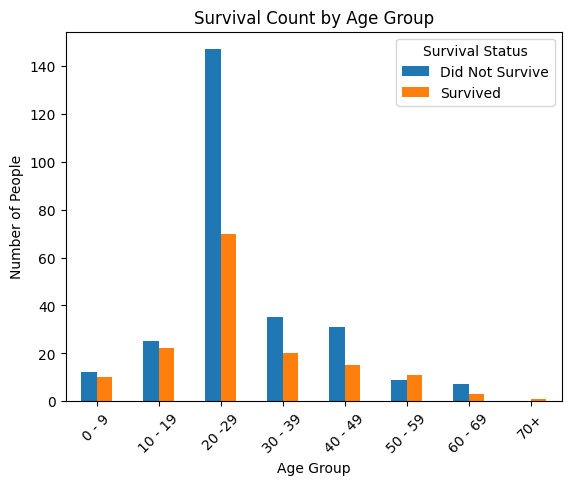

In [55]:
survival_counts.plot(kind='bar', stacked=False)
plt.title('Survival Count by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of People')
plt.xticks(rotation=45)
plt.legend(['Did Not Survive', 'Survived'], title="Survival Status")
plt.show()


In [56]:
survival_rate_by_gender = df.groupby(['Age_bin', 'Sex','Survived']).size().unstack(fill_value=0)

C:\Users\DELL\AppData\Local\Temp\ipykernel_16996\432277284.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_rate_by_gender = df.groupby(['Age_bin', 'Sex','Survived']).size().unstack(fill_value=0)


In [57]:
survival_rate_by_gender

Survived          0   1
Age_bin Sex            
0 - 9   female    0  10
        male     12   0
10 - 19 female    0  22
        male     25   0
20 -29  female    0  70
        male    147   0
30 - 39 female    0  20
        male     35   0
40 - 49 female    0  15
        male     31   0
50 - 59 female    0  11
        male      9   0
60 - 69 female    0   3
        male      7   0
70+     female    0   1
        male      0   0

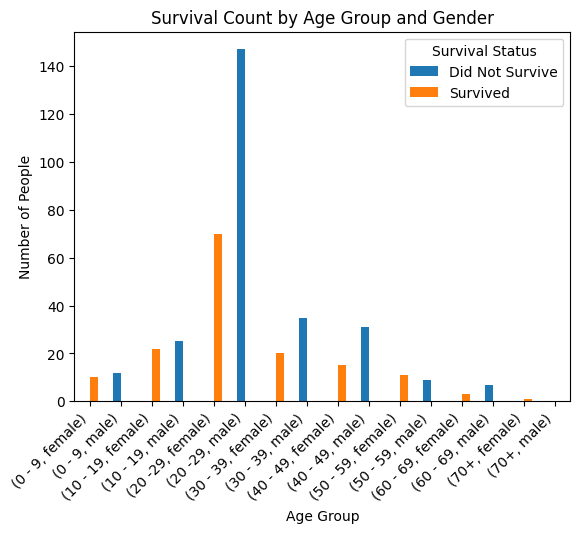

In [58]:
survival_rate_by_gender.plot(kind='bar', stacked=False)
plt.title('Survival Count by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Number of People')
plt.xticks(rotation=45, ha='right')
plt.legend(['Did Not Survive', 'Survived'], title="Survival Status")
plt.show()